In [5]:
import sympy
from sympy.physics.quantum import Bra, Ket
from sympy import Matrix
from sympy.physics.quantum import TensorProduct
from sympy.physics.quantum.gate import HadamardGate,CNotGate, IdentityGate
from sympy.physics.quantum.qapply import qapply
from sympy import eye

from sympy.physics.quantum import Ket
from sympy import sqrt

sympy.init_printing()

In [6]:
#definition des états
ket0 = Matrix([1,0])
ket1 = Matrix([0,1])
plus = Matrix([1/sqrt(2),1/sqrt(2)])
minus = Matrix([1/sqrt(2),-1/sqrt(2)])

In [7]:
I=eye(2)
notgate=Matrix([[0,1], [1,0]])
Hgate = Matrix([[1/sqrt(2),1/sqrt(2)], [1/sqrt(2),-1/sqrt(2)]])
Zgate=Matrix([[1,0], [0,-1]])

SWAP = Matrix ([[1,0,0,0],[0,0,1,0],[0,1,0,0],[0,0,0,1]])
cnotgate = TensorProduct(I,ket0*ket0.T) + TensorProduct(notgate, ket1*ket1.T) # second qubit is the control



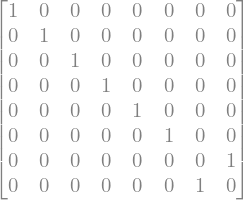

In [8]:
toffoliGate = TensorProduct(ket0*ket0.T,I,I) +TensorProduct(ket1*ket1.T,TensorProduct(ket0*ket0.T,I) + TensorProduct(ket1*ket1.T,notgate))
toffoliGate

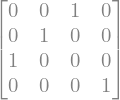

In [70]:
tmp=TensorProduct(I,ket1*ket1.T) + TensorProduct(notgate,ket0*ket0.T)
tmp

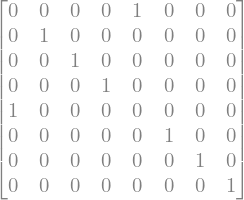

In [71]:
Uf_00=TensorProduct(I,I,ket1*ket1.T) + TensorProduct(tmp,ket0*ket0.T)
Uf_00

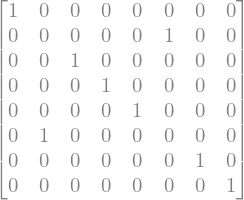

In [72]:
Uf_01=TensorProduct(I,I,ket0*ket0.T) + TensorProduct(TensorProduct(I,ket1*ket1.T)+TensorProduct(notgate,ket0*ket0.T),ket1*ket1.T)
Uf_01

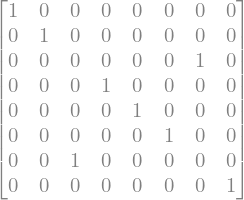

In [73]:
Uf_10=TensorProduct(I,I,ket1*ket1.T) + TensorProduct(TensorProduct(I,ket0*ket0.T)+TensorProduct(notgate,ket1*ket1.T),ket0*ket0.T)
Uf_10

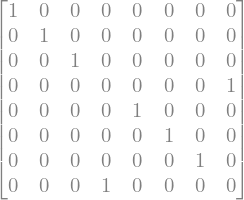

In [74]:
Uf_11 = TensorProduct(I,I,ket0*ket0.T) + TensorProduct(TensorProduct(I,ket0*ket0.T)+TensorProduct(notgate,ket1*ket1.T),ket1*ket1.T)
Uf_11

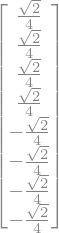

In [75]:
TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)


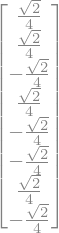

In [76]:
Uf_10*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)

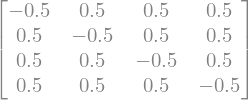

In [77]:
U = (1/2)*Matrix([
    [-1, 1, 1, 1], 
    [1, -1, 1, 1], 
    [1, 1, -1, 1], 
    [1, 1, 1, -1]
])
U

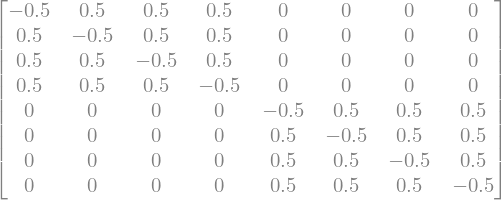

In [78]:
A = TensorProduct (I, U)
A

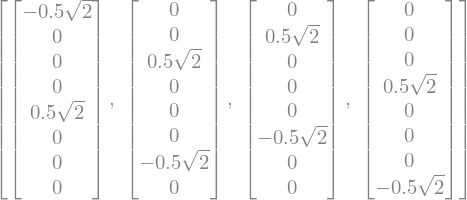

In [79]:
[A*TensorProduct(I,Hgate,Hgate)*Uf_00*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0),
 A*TensorProduct(I,Hgate,Hgate)*Uf_01*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0),
 A*TensorProduct(I,Hgate,Hgate)*Uf_10*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0),
 A*TensorProduct(I,Hgate,Hgate)*Uf_11*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0),
]


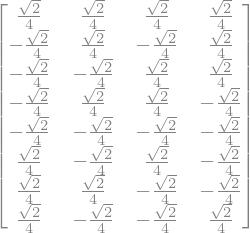

In [80]:
V=Matrix([
    Matrix([TensorProduct(I,Hgate,Hgate)*Uf_00*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
    Matrix([TensorProduct(I,Hgate,Hgate)*Uf_01*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
    Matrix([TensorProduct(I,Hgate,Hgate)*Uf_10*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
    Matrix([TensorProduct(I,Hgate,Hgate)*Uf_11*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
]).T
V

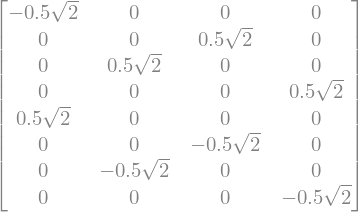

In [81]:
R=Matrix([
    Matrix([A*TensorProduct(I,Hgate,Hgate)*Uf_00*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
    Matrix([A*TensorProduct(I,Hgate,Hgate)*Uf_01*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
    Matrix([A*TensorProduct(I,Hgate,Hgate)*Uf_10*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
    Matrix([A*TensorProduct(I,Hgate,Hgate)*Uf_11*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)]).T,
]).T
R

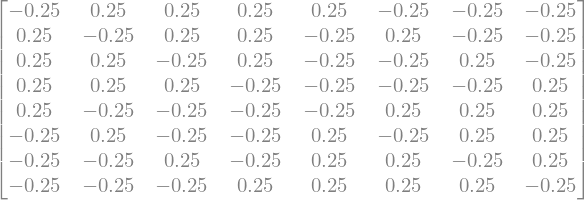

In [82]:
R*V.pinv()

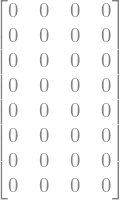

In [83]:
A*V-R

In [84]:
print (R*V.pinv())

Matrix([[-0.250000000000000, 0.250000000000000, 0.250000000000000, 0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000], [0.250000000000000, -0.250000000000000, 0.250000000000000, 0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000], [0.250000000000000, 0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000], [0.250000000000000, 0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000], [0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000, 0.250000000000000, 0.250000000000000], [-0.250000000000000, 0.250000000000000, -0.250000000000000, -0.250000000000000, 0.250000000000000, -0.250000000000000, 0.250000000000000, 0.250000000000000], [-0.250000000000000, -0.250000000000000, 0.2

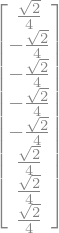

In [85]:
# TensorProduct(minus, 
TensorProduct(I,Hgate,Hgate)*Uf_00*TensorProduct(Hgate*ket1,Hgate*ket0,Hgate*ket0)

# Kraus-Cirac decomposition


$$
fd = -1\times\vert0\rangle\langle0\vert + \vert0\rangle\langle1\vert + \vert1\rangle\langle0\vert - 1\times \vert1\rangle\langle1\vert
$$

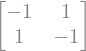

In [61]:
fd = -1*ket0*ket0.T+1*ket0*ket1.T+1*ket1*ket0.T-1*ket1*ket1.T
fd

$$
I \oplus fd
$$

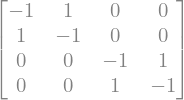

In [57]:
TensorProduct(I,fd)

$$
sd = \vert0\rangle\langle0\vert + \vert0\rangle\langle1\vert + \vert1\rangle\langle0\vert + \vert1\rangle\langle1\vert
$$

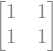

In [58]:
sd = 1*ket0*ket0.T+1*ket0*ket1.T+1*ket1*ket0.T+1*ket1*ket1.T
sd

$$
NOT \oplus sd
$$

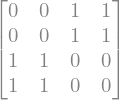

In [42]:
TensorProduct(notgate,sd)

$$
U = \frac{1}{2}*(I \oplus fd + NOT \oplus sd)
$$

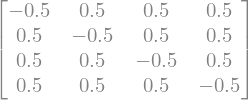

In [45]:
(1/2)*(TensorProduct(I,fd) + TensorProduct(notgate,sd))

In [1]:
def Controlled(U):
    return TensorProduct(ket0*ket0.T, I) + TensorProduct(ket1*ket1.T, U)

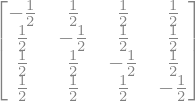

In [10]:

TensorProduct(Hgate,I)*Controlled(notgate)*TensorProduct(Hgate,I)*TensorProduct(notgate,notgate)

Et voici la [solution dans Quirk](https://algassert.com/quirk#circuit={%22cols%22:[[%22H%22,%22H%22,%22H%22],[%22~gnbm%22],[%22H%22,%22H%22],[%22H%22],[%22%E2%80%A2%22,%22X%22],[%22H%22],[%22X%22,%22X%22]],%22gates%22:[{%22id%22:%22~diut%22,%22name%22:%22F00C%22,%22circuit%22:{%22cols%22:[[%22%E2%97%A6%22,%22%E2%97%A6%22,%22X%22]]}},{%22id%22:%22~7gpq%22,%22name%22:%22F01C%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,%22%E2%97%A6%22,%22X%22]]}},{%22id%22:%22~gnbm%22,%22name%22:%22F10C%22,%22circuit%22:{%22cols%22:[[%22%E2%97%A6%22,%22%E2%80%A2%22,%22X%22]]}},{%22id%22:%22~6r1f%22,%22name%22:%22F11C%22,%22circuit%22:{%22cols%22:[[%22%E2%80%A2%22,%22%E2%80%A2%22,%22X%22]]}},{%22id%22:%22~niml%22,%22name%22:%22F00M%22,%22matrix%22:%22{{0,0,0,0,1,0,0,0},{0,1,0,0,0,0,0,0},{0,0,1,0,0,0,0,0},{0,0,0,1,0,0,0,0},{1,0,0,0,0,0,0,0},{0,0,0,0,0,1,0,0},{0,0,0,0,0,0,1,0},{0,0,0,0,0,0,0,1}}%22},{%22id%22:%22~9sh2%22,%22name%22:%22F01M%22,%22matrix%22:%22{{1,0,0,0,0,0,0,0},{0,0,0,0,0,1,0,0},{0,0,1,0,0,0,0,0},{0,0,0,1,0,0,0,0},{0,0,0,0,1,0,0,0},{0,1,0,0,0,0,0,0},{0,0,0,0,0,0,1,0},{0,0,0,0,0,0,0,1}}%22},{%22id%22:%22~dogi%22,%22name%22:%22F10M%22,%22matrix%22:%22{{1,0,0,0,0,0,0,0},{0,1,0,0,0,0,0,0},{0,0,0,0,0,0,1,0},{0,0,0,1,0,0,0,0},{0,0,0,0,1,0,0,0},{0,0,0,0,0,1,0,0},{0,0,1,0,0,0,0,0},{0,0,0,0,0,0,0,1}}%22},{%22id%22:%22~viov%22,%22name%22:%22F11M%22,%22matrix%22:%22{{1,0,0,0,0,0,0,0},{0,1,0,0,0,0,0,0},{0,0,1,0,0,0,0,0},{0,0,0,0,0,0,0,1},{0,0,0,0,1,0,0,0},{0,0,0,0,0,1,0,0},{0,0,0,0,0,0,1,0},{0,0,0,1,0,0,0,0}}%22},{%22id%22:%22~5lr9%22,%22name%22:%22U%22,%22matrix%22:%22{{-%C2%BD,%C2%BD,%C2%BD,%C2%BD},{%C2%BD,-%C2%BD,%C2%BD,%C2%BD},{%C2%BD,%C2%BD,-%C2%BD,%C2%BD},{%C2%BD,%C2%BD,%C2%BD,-%C2%BD}}%22},{%22id%22:%22~rssu%22,%22name%22:%22myU%22,%22matrix%22:%22{{0.0826902,0.4760478,0.5266797,0.1419818,0.5826902,-0.0239522,0.0266797,-0.3580182},{0.1763118,-0.0221848,0.3215547,0.6830707,-0.3236882,0.4778152,-0.1784453,0.1830707},{0.1710094,-0.0559056,0.1280949,0.3350088,-0.3289906,-0.5559056,0.6280949,-0.1649912},{0.6072783,0.0188629,0.0907125,-0.0413008,0.1072783,-0.4811371,-0.4092875,0.4586992},{0.5826902,-0.0239522,0.0266797,-0.3580182,0.0826902,0.4760478,0.5266797,0.1419818},{-0.3236882,0.4778152,-0.1784453,0.1830707,0.1763118,-0.0221848,0.3215547,0.6830707},{-0.3289906,-0.5559056,0.6280949,-0.1649912,0.1710094,-0.0559056,0.1280949,0.3350088},{0.1072783,-0.4811371,-0.4092875,0.4586992,0.6072783,0.0188629,0.0907125,-0.0413008}}%22}],%22init%22:[0,0,1]})

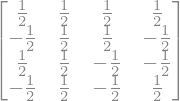

In [67]:
TensorProduct(I, Zgate)*cnotgate*TensorProduct(Hgate, Hgate)

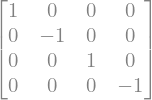

In [68]:
TensorProduct(I, Zgate)


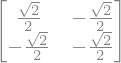

In [77]:
Zgate*Hgate*Zgate
